### Objectives

The primary aim of this notebook is to thoroughly analyze the dataset’s variables and their interconnections. This analysis will inform the selection and development of machine learning models that align with overarching project goals to enrich understanding of our portfolio of projects and identify patterns in the types of projects driving revenue. The insights gained will not only influence the choice of models but also identify necessary preprocessing steps to prepare the dataset for machine learning applications.

Additionally, this exploratory analysis serves a secondary purpose: to validate business hypotheses and extract initial findings that could provide immediate value.

### Insights of Interest
*In sections rn but turn into integrated presentation of most important findings*

Univariate
*Insert*

### Package  & Data Imports + Path Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt

In [2]:
# Enabling importing of modules from utils directory

# construct path to utils directory
path_to_utils = os.path.abspath(os.path.join(os.path.dirname('__file__'), 'utils')) 

# avoid adding multiple times
if path_to_utils not in sys.path:
    sys.path.append(path_to_utils)

In [3]:
from utils.kseda import plot_histograms

In [4]:
df = pd.read_excel("./data/cleaned_data.xlsx")
df.head(3)

,id,name,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,...,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,usd_goal,name2,name_len2,name_len_clean_2
0,1538064060,MAGIC PIXEL - Bluetooth full color LED display,15000.0,5933.0,failed,False,GB,GBP,2016-03-19 09:31:29,2016-03-19 09:31:32,...,18,2016,9,62,30,30,21450,MAGIC PIXEL - Bluetooth full color LED display,8,8
1,556771080,SmartPi - Turn your Raspberry Pi into a SmartM...,9000.0,16552.0,successful,False,DE,EUR,2016-04-03 08:05:09,2016-04-03 08:05:10,...,18,2016,8,9,45,45,10034,SmartPi - Turn your Raspberry Pi into a SmartM...,9,6
2,839314928,PlantSitter - The World's Smartest Plant Monit...,60000.0,43234.0,canceled,False,US,USD,2016-03-29 08:01:08,2016-03-28 09:46:41,...,18,2016,8,18,40,39,60000,PlantSitter - The World's Smartest Plant Monit...,8,7


### Preparation

Earlier QA preprocessing had minimal column removal for flexibility preparing the dataset for alternative future purposes. As our purpose is known in this case, certain columns can be dropped: ID columns, non-US currency columns, and previous versions of the `name` columns.

In [5]:
to_drop = ['id', 'goal', 'pledged', 'static_usd_rate', 'name', 'name_len', 'name_len_clean' ]
for col in to_drop:
    if col in df.columns:
        df.drop(columns = [col], inplace= True)

Preparing lists of columns which are better analyzed seperately.

In [6]:
datetimecols = ['deadline_month','deadline_day','deadline_yr','deadline_hr','state_changed_at_month','state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr','created_at_month','created_at_day','created_at_yr','created_at_hr',
                'launched_at_month', 'launched_at_day', 'launched_at_yr','launched_at_hr', 'created_at_weekday', 'launched_at_weekday', 'deadline_weekday', 'state_changed_at_weekday'] 

timestampcols = ['deadline', 'state_changed_at', 'created_at', 'launched_at']

catcols = df.select_dtypes(include=['object', 'bool']).columns.to_list()

for col in datetimecols:
    if col in catcols:
        catcols.remove(col)

numcols = [col for col in df.columns if col not in catcols + datetimecols + timestampcols]

fundingcols = ['backers_count', 'usd_pledged', 'usd_goal']

print("Numerical Variables: ", numcols)
print("Categorical Variables: ", catcols)

Numerical Variables:  ['backers_count', 'usd_pledged', 'blurb_len', 'blurb_len_clean', 'create_to_launch_days', 'launch_to_deadline_days', 'launch_to_state_change_days', 'usd_goal', 'name_len2', 'name_len_clean_2']
Categorical Variables:  ['state', 'disable_communication', 'country', 'currency', 'staff_pick', 'category', 'spotlight', 'name2']


### Univariate Analysis

#### Descriptive Statistics on Numerical Variables

In [7]:
pd.set_option('display.max_columns', None)
df[numcols].describe().round(2)

,backers_count,usd_pledged,blurb_len,blurb_len_clean,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,usd_goal,name_len2,name_len_clean_2
count,15474.00,15474.00,15470.00,15470.00,15474.00,15474.00,15474.00,1.547400e+04,15474.00,15474.00
mean,181.17,19975.49,18.99,13.03,46.91,34.68,32.02,9.474142e+04,5.80,4.73
std,1287.83,114439.55,4.64,3.26,101.77,11.98,13.67,1.462852e+06,2.84,2.25
min,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.000000e+00,1.00,0.00
25%,2.00,24.86,17.00,11.00,3.00,30.00,29.00,4.000000e+03,3.00,3.00
50%,12.00,676.84,20.00,13.00,13.00,30.00,30.00,1.250000e+04,6.00,5.00
75%,63.00,5896.88,22.00,15.00,43.00,40.00,35.00,4.482050e+04,8.00,6.00
max,105857.00,6225354.98,35.00,30.00,1528.00,91.00,91.00,1.000000e+08,16.00,14.00


**Observations**
* Observing zero minimums for backers count and funds raised (`usd_pledged`) seems logical as projects could be canceled, suspended, or simply very unsuccesful. The dataset does not include projects which are in an actively fundraising state, so this explanation for zero minimums would not apply. It may be beneficial to exclude suspended projects from the clustering analysis as identifying patterns for that status is not as relevant to the analytical objective.
* For funding related variables (`usd_goal`, `usd_pledged`, and `backers_count`) and project timeline variables (`create_to_launch_days`, `launch_to_deadline_days`, and `launch_to_state_change_days`), the interquartile ranges (IQRs) are fairly compact with notable positive extremes on the positive. Investigating the distribution and relationship to other variables will be important for determining whether these outliers represent a meaningful segment of projects or are anomolies to exclude.


#### Data Distributions - Numerical

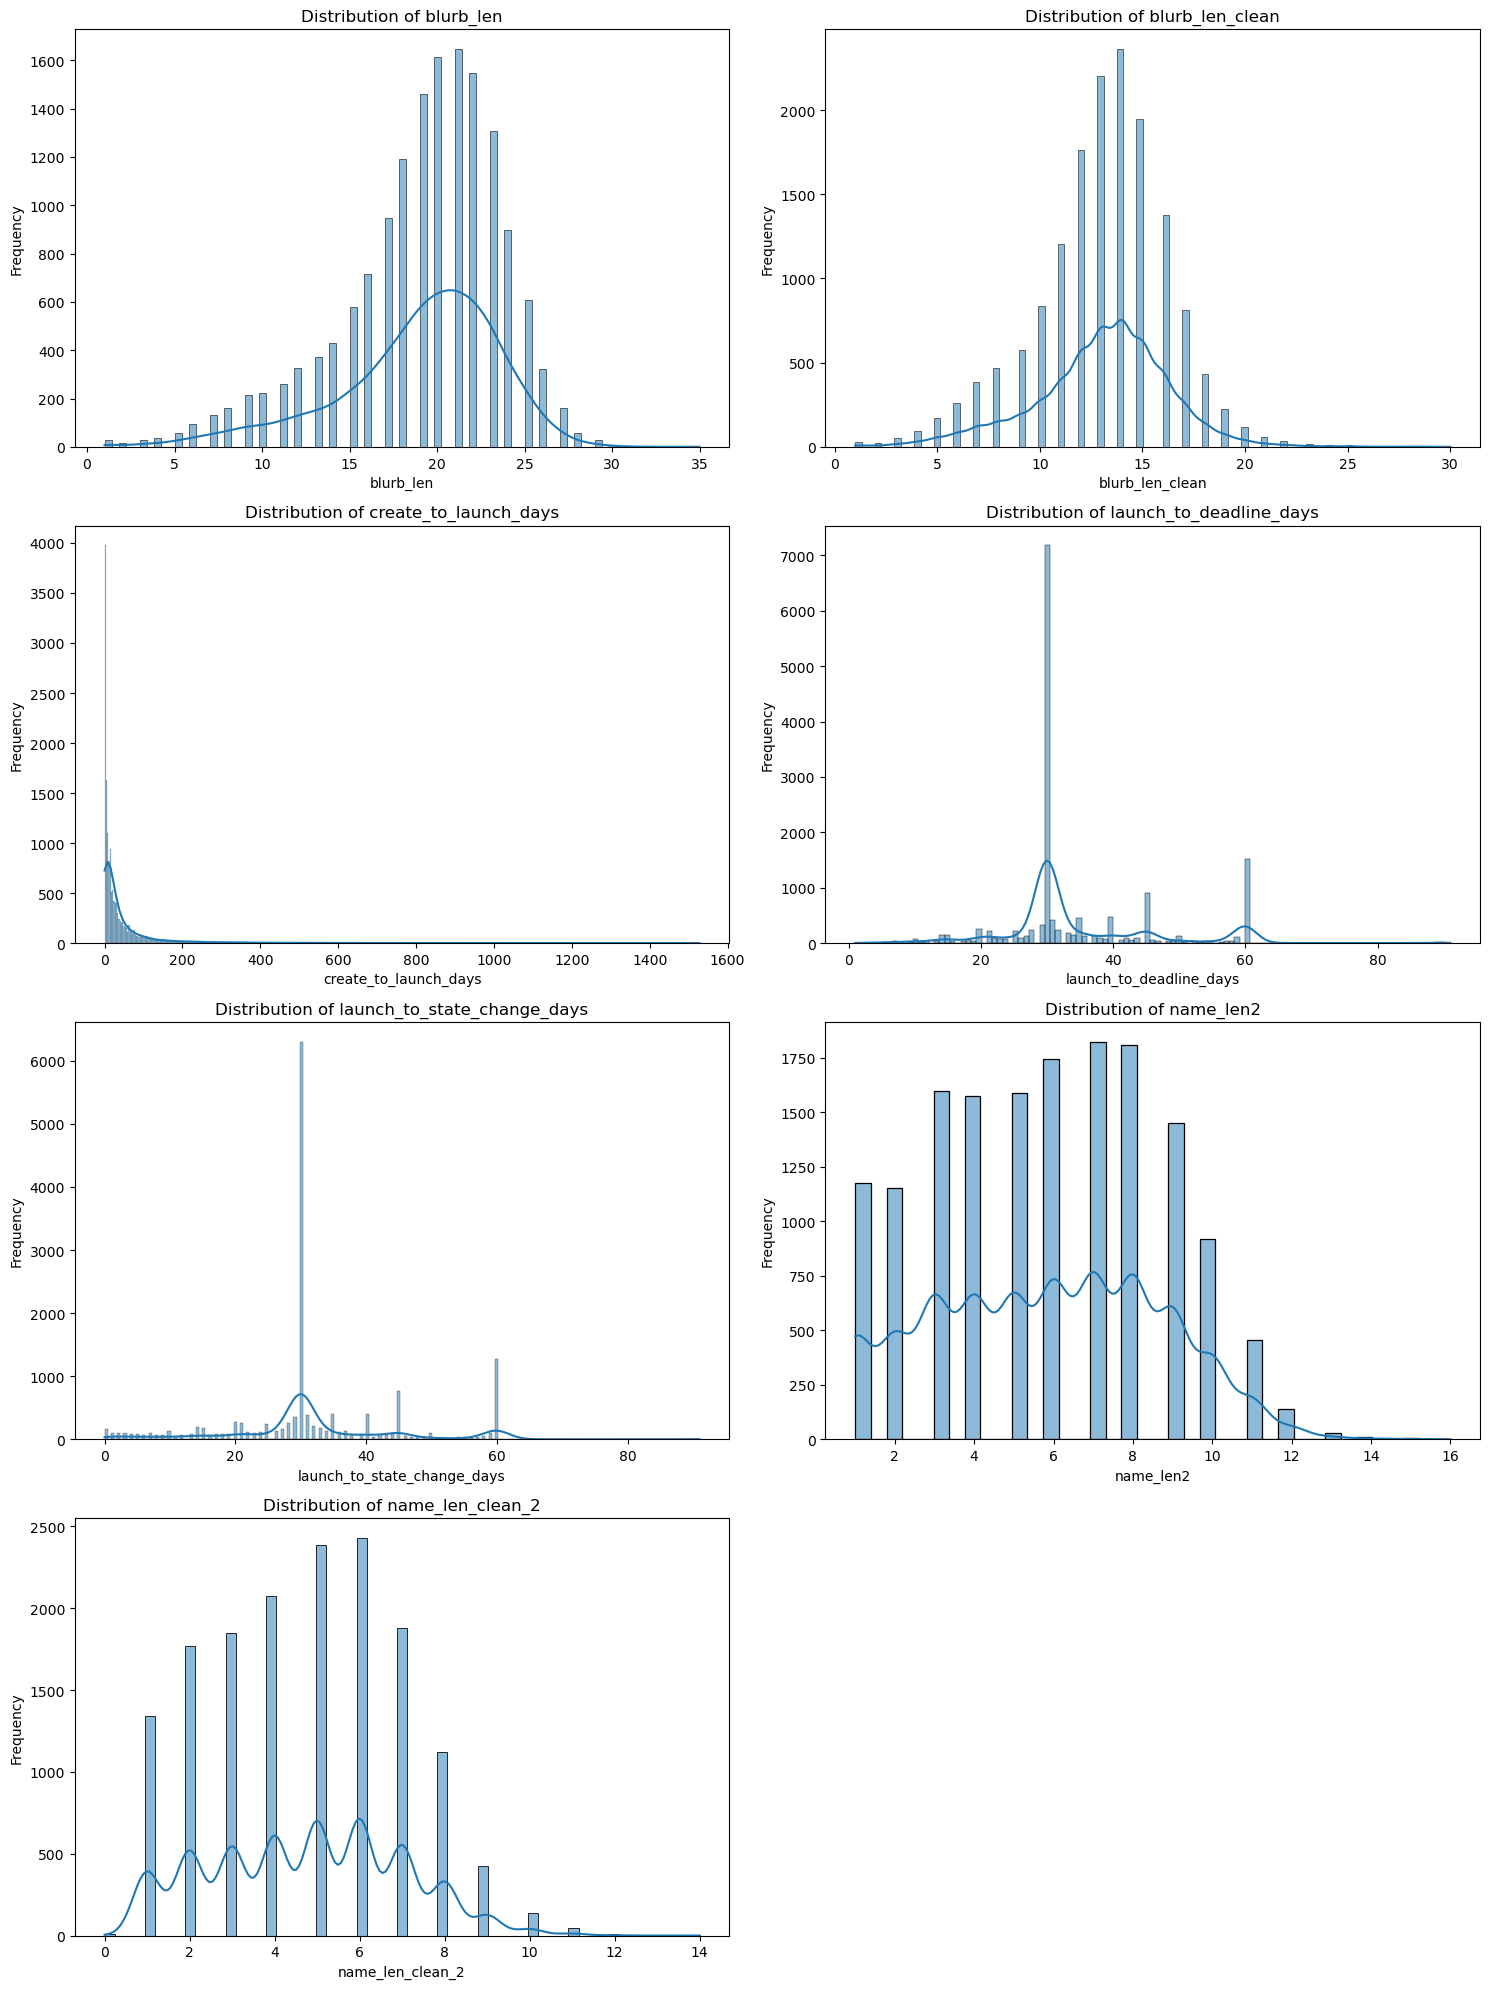

In [7]:
# Exclude funding columns to handle separately
filteredcols = [col for col in numcols if col not in fundingcols]

fig, axes = plot_histograms(df, filteredcols, kde = True, n_cols=2)
plt.show()

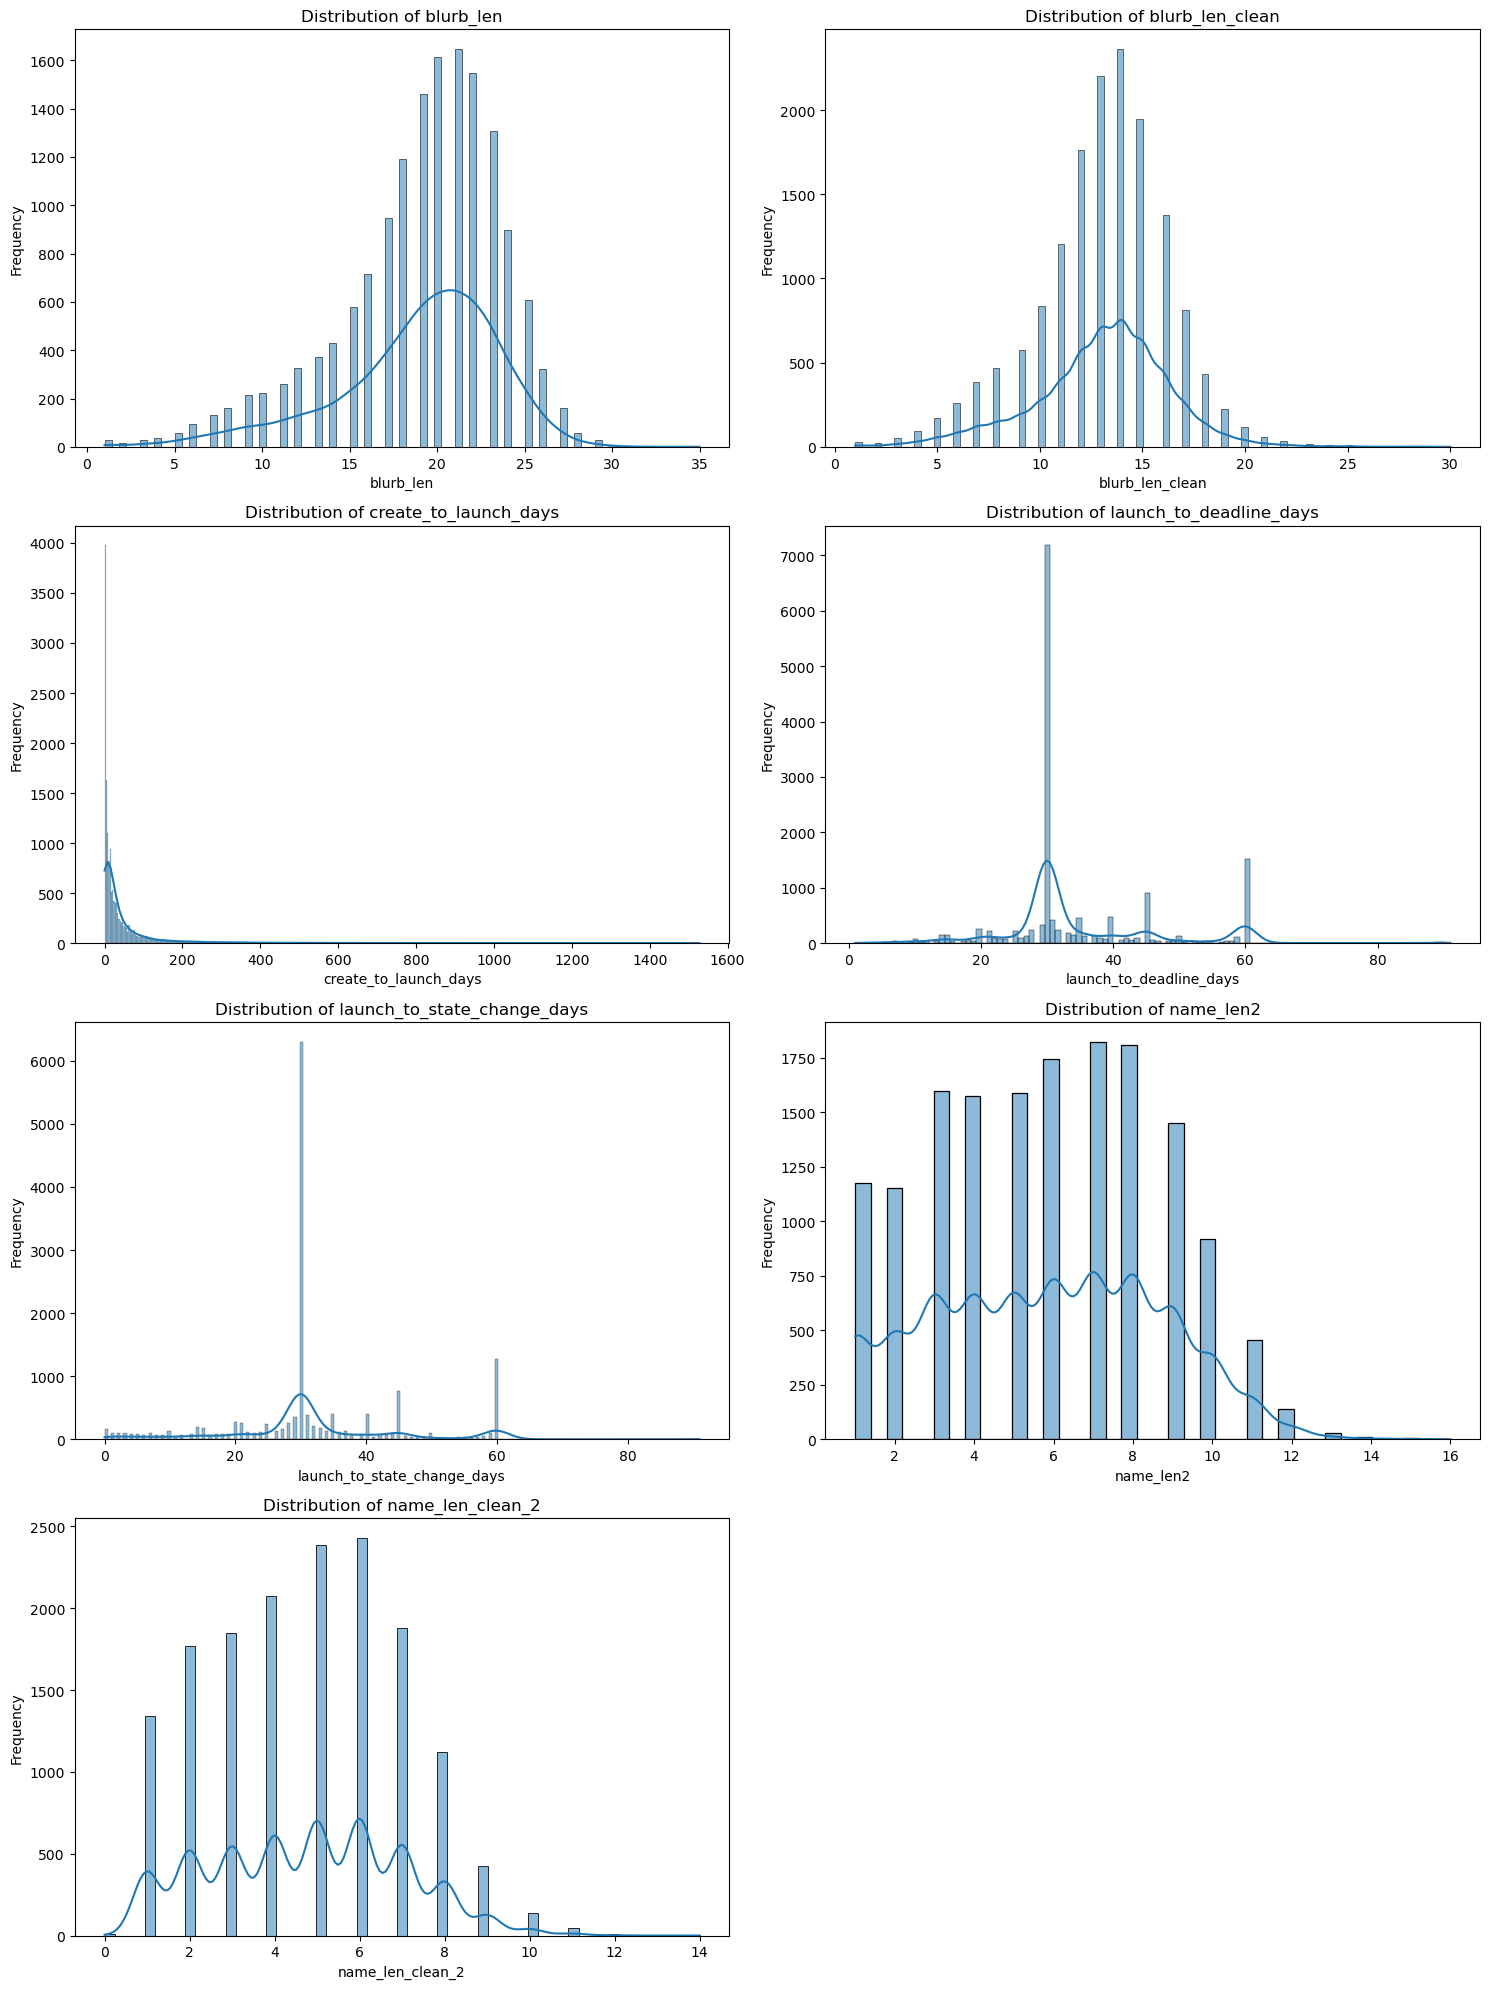

In [7]:
# # Exclude funding columns to handle separately
# filteredcols = [col for col in numcols if col not in fundingcols]

# fig, axes = plot_histograms(df, filteredcols, n_cols=2)
# plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

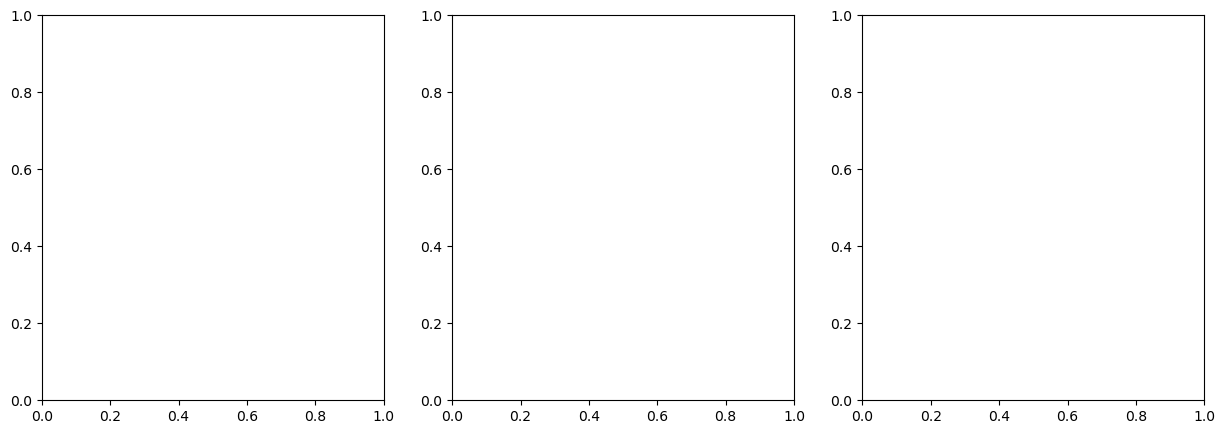

In [8]:
fig, axes = plot_histograms(df, fundingcols, n_cols=3, bins=10)
plt.show()

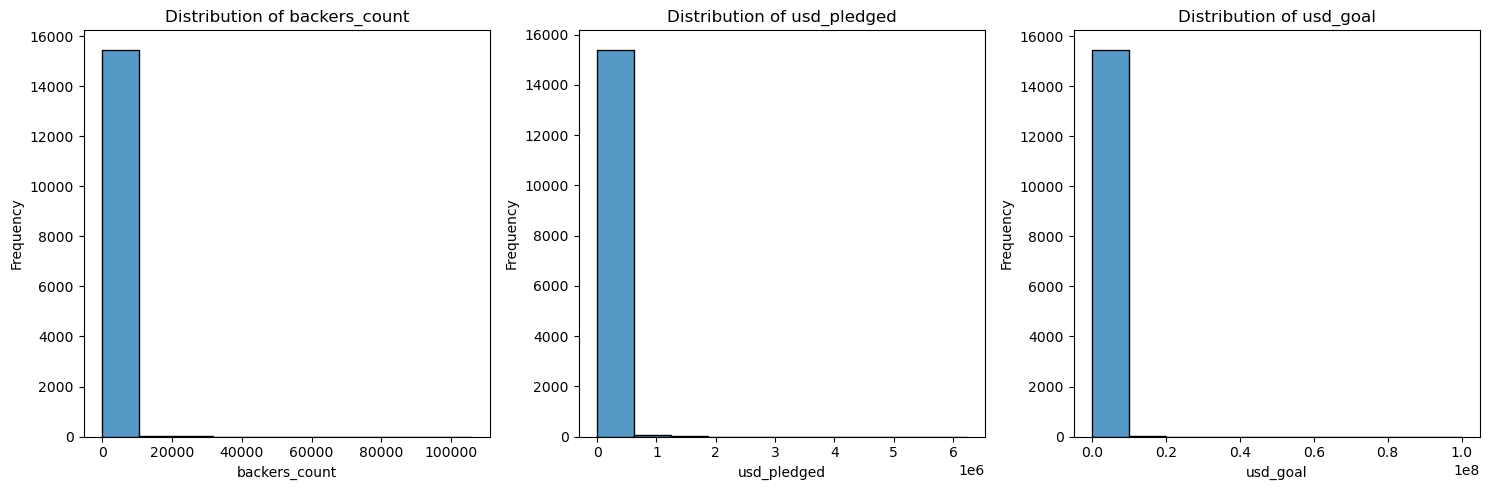

In [9]:
# Set figure layout
n_cols = 3
n_rows = (len(fundingcols) + n_cols - 1) // n_cols  

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Ensure axes iterable in the same way
axes = axes.flatten() if n_rows > 1 else np.array(axes).flatten()

# Plot histograms for each variable
for i, col in enumerate(fundingcols):
    sns.histplot(df[col], kde=False, ax=axes[i], bins=10) # manualy setting numner of bins. Make this an optional argument in my custom function
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(len(fundingcols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


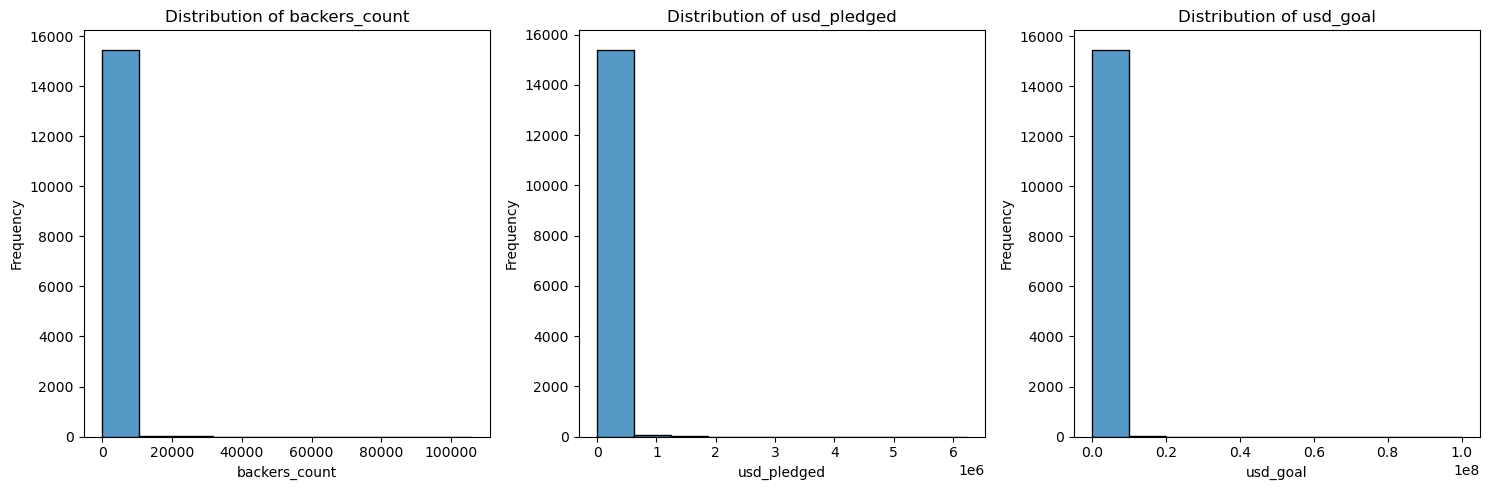

In [39]:
# Set figure layout
n_cols = 3
n_rows = (len(fundingcols) + n_cols - 1) // n_cols  

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Ensure axes iterable in the same way
axes = axes.flatten() if n_rows > 1 else np.array(axes).flatten()

# Plot histograms for each variable
for i, col in enumerate(fundingcols):
    sns.histplot(df[col], kde=False, ax=axes[i], bins=10) # manualy setting numner of bins. Make this an optional argument in my custom function
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(len(fundingcols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


**Observations**
* The extreme right skew for funding related variables aligns with the data range observations from descriptive stats. The interpretation for `create_to_launch_days` is similarly aligned. 
* By contrast, plotting `launch_to_deadline_days` in this way reveals a bimodal distribution with the most significant peak around 30 days and minor around 60 days. The major peak is consistent with platform guidance to have funding periods of 30 days or less. The bimodal distribution observed for `launch_to_state_change_days` follows a similar pattern. 
* The distribution for the length of projects' descriptive blurbs, `blurb_len`, is skewed left slightly but with stop words removed in `blurb_len_clean` it becomes a fairly normal distribution. With mean, median and mode pointing to a central tendency around 14 meainingful words, it suggests a commonality in how creators choose to describe projects, potentially adhering to informal or platform norms about how much textual information to provide to engage potential backers. Similar implications may be drawn from the unimaodal and roughly symmetircal distrubtions for the project name length variables.

#### Extreme Values - Funding Related Variables

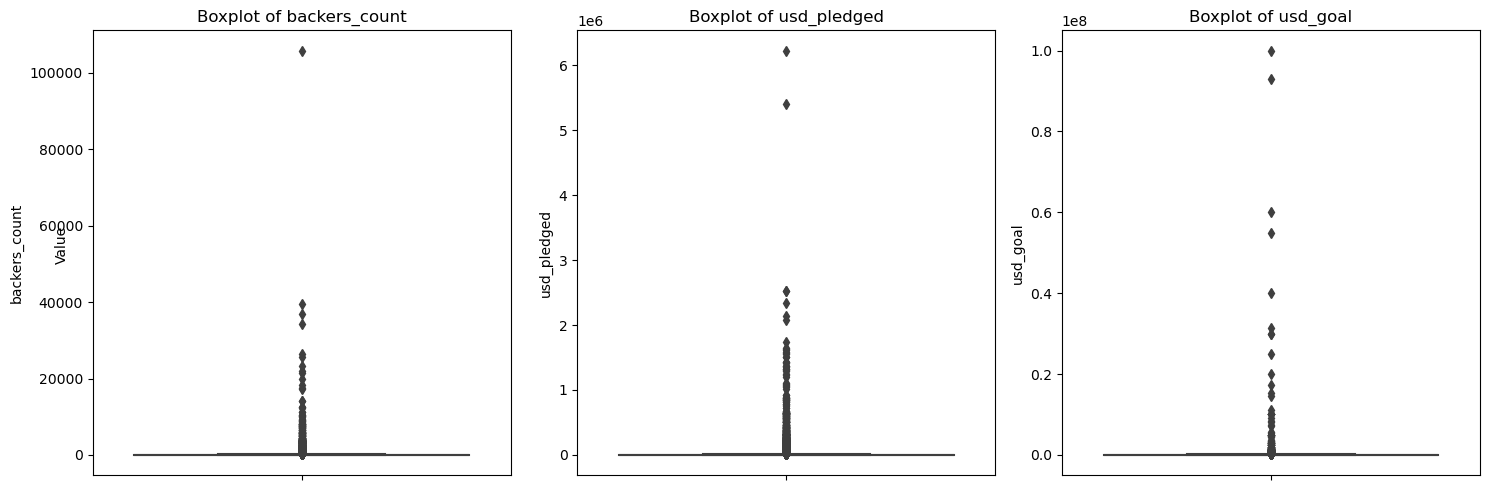

In [42]:
# Set figure layout
n_cols = 3 
n_rows = (len(fundingcols) + n_cols - 1) // n_cols 

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Ensure axes iterable in the same way
axes = axes.flatten() if n_rows > 1 else np.array(axes).flatten()

# Plot histograms for each variable
for i, col in enumerate(fundingcols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set a common y-label
fig.text(0.04, 0.5, 'Value', va='center', rotation='vertical')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [23]:
fundingextremes = pd.DataFrame()

# Loop through the columns, get the top 5, tag the source, and concatenate
for col in fundingcols:
    top_df = df.nlargest(5, col).copy() 
    top_df['source'] = col  # Tag the source before concatenating
    fundingextremes = pd.concat([fundingextremes, top_df], ignore_index=True)
# Not dropping duplicates in order to note if same record is an outlier in multiple ways

In [24]:
fundingextremes[['state', 'country', 'staff_pick', 'spotlight', 'category', 'source']]

,state,country,staff_pick,spotlight,category,source
0,successful,US,True,True,Web,backers_count
1,successful,US,True,True,Hardware,backers_count
2,successful,US,True,True,Hardware,backers_count
3,successful,US,True,True,Uncategorized,backers_count
4,successful,US,True,True,Hardware,backers_count
5,successful,US,True,True,Sound,usd_pledged
6,successful,US,True,True,Web,usd_pledged
7,successful,US,True,True,Sound,usd_pledged
8,successful,GB,True,True,Uncategorized,usd_pledged
9,successful,US,True,True,Hardware,usd_pledged


**Observations**
* For each of the funding variables, there are a only handful of data points causing the signficant skew. Taking a closer look at these cases, we find that none are in a cancelled or suspended state that would easily disqualify them as invalid records. Indeed, most are Staff Picks & Spotlighted, signalling legitimacy of the projects and an expectation or hope that such projects would be on the platform.
* The projects which failed and were not priviledged by Kickstarter are those which were in the top 5 in terms of goals - aspiration - instead of amount pledged or backers - verfiable success. That said, this does not preclude such projects from being considered as part of the kickstarter project portfolio. 
* Without reasonable grounds to exclude these outliers, potential solutions when clustering could be to apply log transformations on these variables, construct a seperate clustering model for projects with highly positive values for funding variables, or construct models with and without these outliers and compare the results.

**Examining data distribution excluding outliers**

In [6]:
# Function to filter out values outside the IQR
def filter_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

In [15]:
for col in fundingcols:
    withiniqr = filter_iqr(df, col)
    print(f"Percentage of records for {col} outside IQR: {1 - len(withiniqr) / df.shape[0]}")

Percentage of records for backers_count outside IQR: 0.14715005816207838
Percentage of records for usd_pledged outside IQR: 0.15897634742148115
Percentage of records for usd_goal outside IQR: 0.08536900607470599


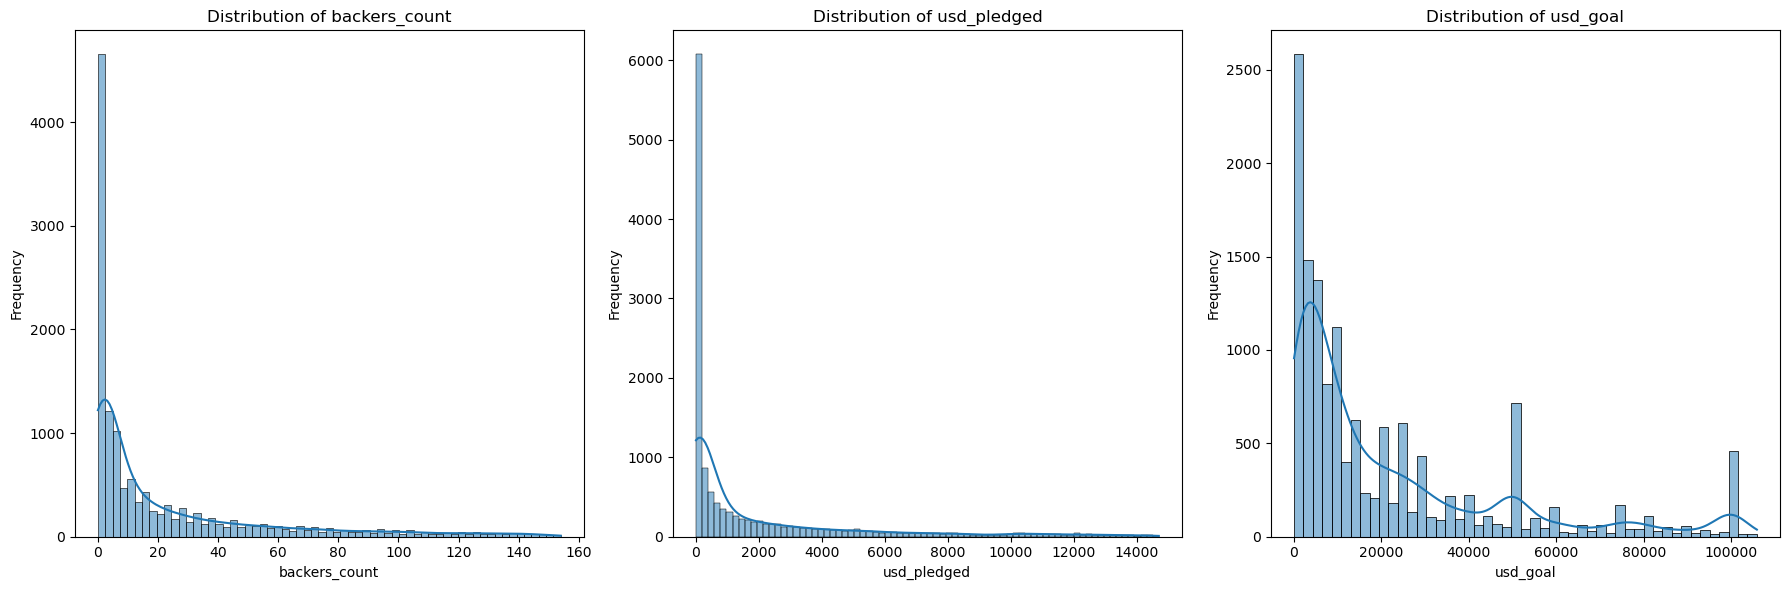

In [13]:
## slighlty different set of operations since filter_iqr function being used. Can't combine with the earlier histogram function. 
# Set figure layout
n_cols = 3 
n_rows = 1

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18,6))

# Ensure axes iterable in the same way
axes = axes.flatten() if n_rows > 1 else np.array(axes).flatten()
                         
# Plot histograms for each variable
for i, col in enumerate(fundingcols):
    outsideiqr = filter_iqr(df, col)
    sns.histplot(outsideiqr[col], kde=True, ax=axes[i]) #kde to visualize probabibility density of data
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

**Observations**
* Even when considering the data with extreme values removed via the IQR method, a clear right skew is still observed. The notable positive skew appears to simply be the nature of the underlying data distribution for these variables. 
* Viewing the percentage of records outside IQR provides context that it is a nontrivial portion of the sample being excluded when looking at the adjusted data distributions. However, this pared down view does allow for some patterns to be observed with `usd_goal`. Namely that is multimodal. Most projects appear clustered in the 0 to $200,000 range. But more modest peaks appear around $500,000 and around $1MM. Potentially these higher values are easily-conceptialized "moonshot" goals towards which a campaign's community may be inspired. 


In [39]:
# DON'T DELETE THIS UNTIL NEAR THE END
# box plot for `backers_count`, `usd_pledged`, and `usd_goal`. check out outliers. can we dismiss them? or need them?

# then do box plots of the others and see how to treat the outliers --> i think the only scenario i'm dropping an outlier entirely is if it's also a suspended project. so it's probaby in the bivariate analysis that I'll make a call
# re: outliers

**that wraps it for numerical univariate i think**

In [48]:
# Remove 'name2' from the list
if 'name2' in catcols:
    catcols.remove('name2')

print(catcols)

['state', 'disable_communication', 'country', 'staff_pick', 'category', 'spotlight']


In [49]:
# check number of unique values for categorical variables

for col in catcols:
    num_unique_values = df[col].nunique()
    print(f"Number of unique values in {col}: {num_unique_values}")

Number of unique values in state: 4
Number of unique values in disable_communication: 2
Number of unique values in country: 18
Number of unique values in staff_pick: 2
Number of unique values in category: 24
Number of unique values in spotlight: 2


Noting here that country and category are two potentially important variables which have a farily high cardinality. All others have expected numbers of unique values and are not high in cardinality

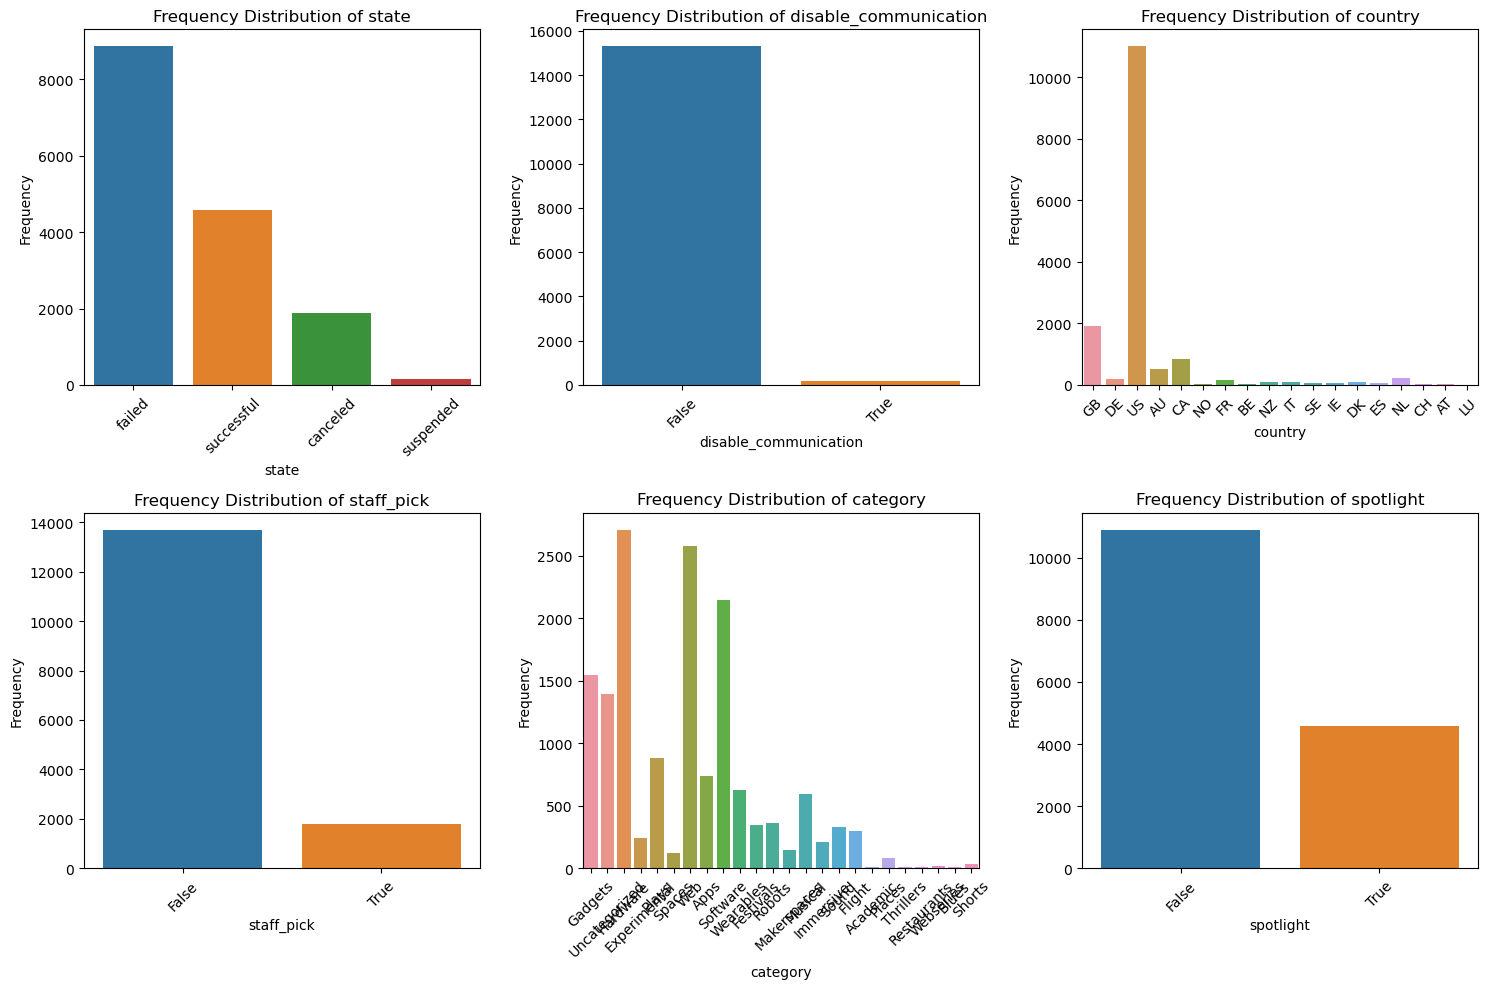

In [50]:
# Set figure layout
n_cols = 3  
n_rows = (len(catcols) + n_cols - 1) // n_cols  # Number of rows in the subplot grid

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration if it's multidimensional
axes = axes.flatten() if n_rows > 1 else [axes]

# Plot frequency distributions for each categorical column
for i, col in enumerate(catcols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Frequency Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)  # Rotate x-axis labels for better readability

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

* About twice as many failed projects as successful, which intuitively feels pretty good / normal but can look for some kind of benchmark to make this claim. Very few having to be suspended, which is good.
* Very few having disabled communication. I'd be interested to see the relationship between disabled comms and being suspended or canceled in the bivariate analysis
* US alone is the source of the bulk of the projects. Intuitively makes snese. Beleive it's an American company, and America also has that entreprenurial spirit I guess. GB is a very far second but substantially more than the other notables countries: Canada, Australia, Netherlands, and Denmark. Perhaps this column would ned up being treated as a binary flag of US vs non-US. 
* Staff-picks for about 15% of the dataset. Makes sense, and may even be high. About 30% of projects are spotlighted. 
* **Category plot not legible. will make anew**

In [ ]:
# do a bigger version of category so it's legible

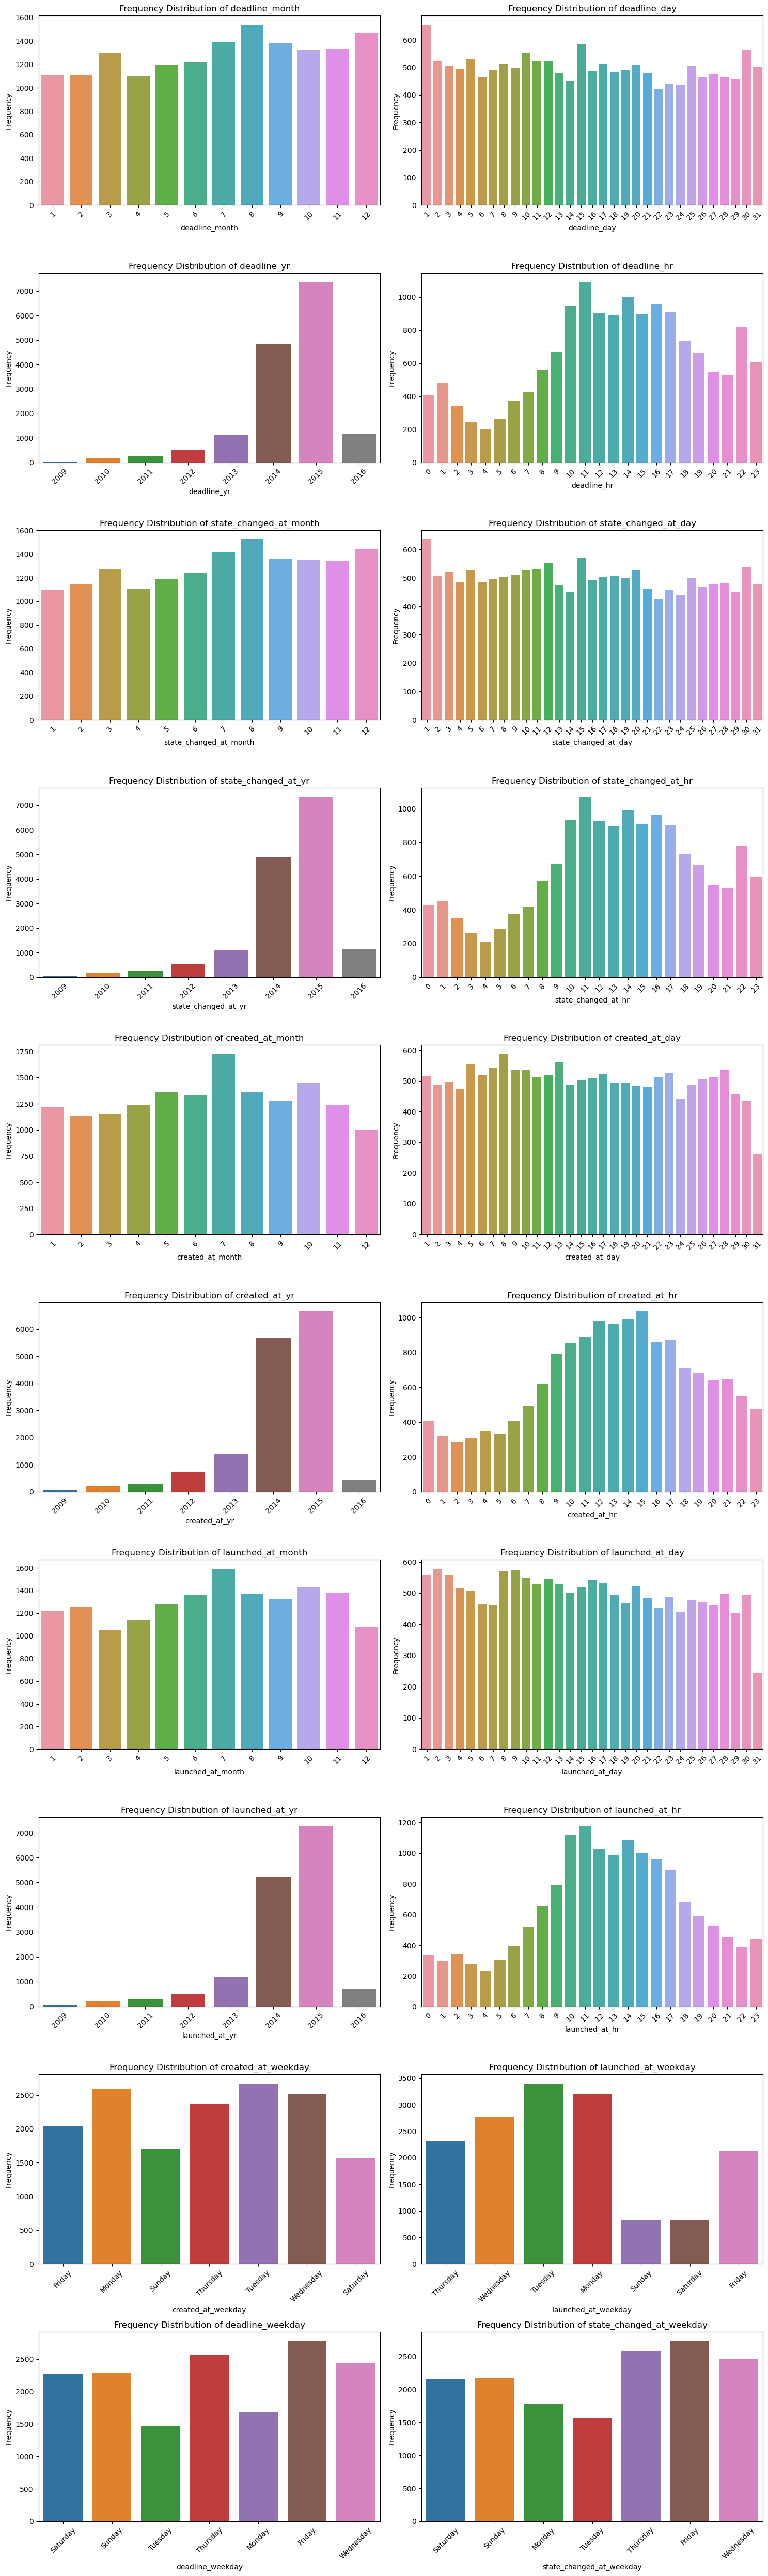

In [56]:
# Set figure layout
n_cols = 2  
n_rows = (len(datetimecols) + n_cols - 1) // n_cols  # Number of rows in the subplot grid

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration if it's multidimensional
axes = axes.flatten() if n_rows > 1 else [axes]

# Plot frequency distributions for each categorical column
for i, col in enumerate(datetimecols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Frequency Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)  # Rotate x-axis labels for better readability

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

* Fairly uniform distributions for day variables. No pattern there. Indication that this may not be useful for the ML model, even if binned into broader portions of a given month.
* 2014 and 2015 most represented for year variables. May just be due to what data got pulled. perhaps we look at clustering just those two years? if any market difference in data distributuisn across years and there's enough data with just those. 
* pretty significanttly higher creation in July. **check that out**, is it one year pushing it up or what? maybe in bivariate. 
* unclear if hours captured are in local timezone. if so, the bulk seems to be around usual hours for when people are up and doing things
* not much interesting about the days of the week except that there is a clear preference to launch on weekdays rather than weekends. maybe people expect less site traffic / attention to be paid on weekends or maybe (if launches typcially aren't automated, they themselves are not on the platform. in either case, low traffic time for at least one major part of the user base - creartors or contributors.)

In [ ]:
# frequency distributions of datetime variables

In [ ]:
# check proportion assigned to each of the top 10 values for the categorical variables

In [57]:
# check nature of categories for sense of how to encode - think this was about that cyclical check thing? leave that to the feature engineering notebook. 

### Bivariate Analysis

In [ ]:
# vary other veriables with year
# vary other variables with state 

Upon validation, the currency for fundraising does not differ in the same country. This means that there is no extra information captured by having both the country and currency variable. However, given the higher cardinality in the `country` compated to `currency`, `currency` may prove to be a helpful proxy variable for geographic factors.

In [40]:
# checking if currency always matches with country
df['cc'] = df['country'] + df['currency']
df['cc'].unique() # currency for fundraising does not differ in the same country. No extra information captured having both the country and currency variable. 

array(['GBGBP', 'DEEUR', 'USUSD', 'AUAUD', 'CACAD', 'NONOK', 'FREUR',
       'BEEUR', 'NZNZD', 'ITEUR', 'SESEK', 'IEEUR', 'DKDKK', 'ESEUR',
       'NLEUR', 'CHCHF', 'ATEUR', 'LUEUR'], dtype=object)

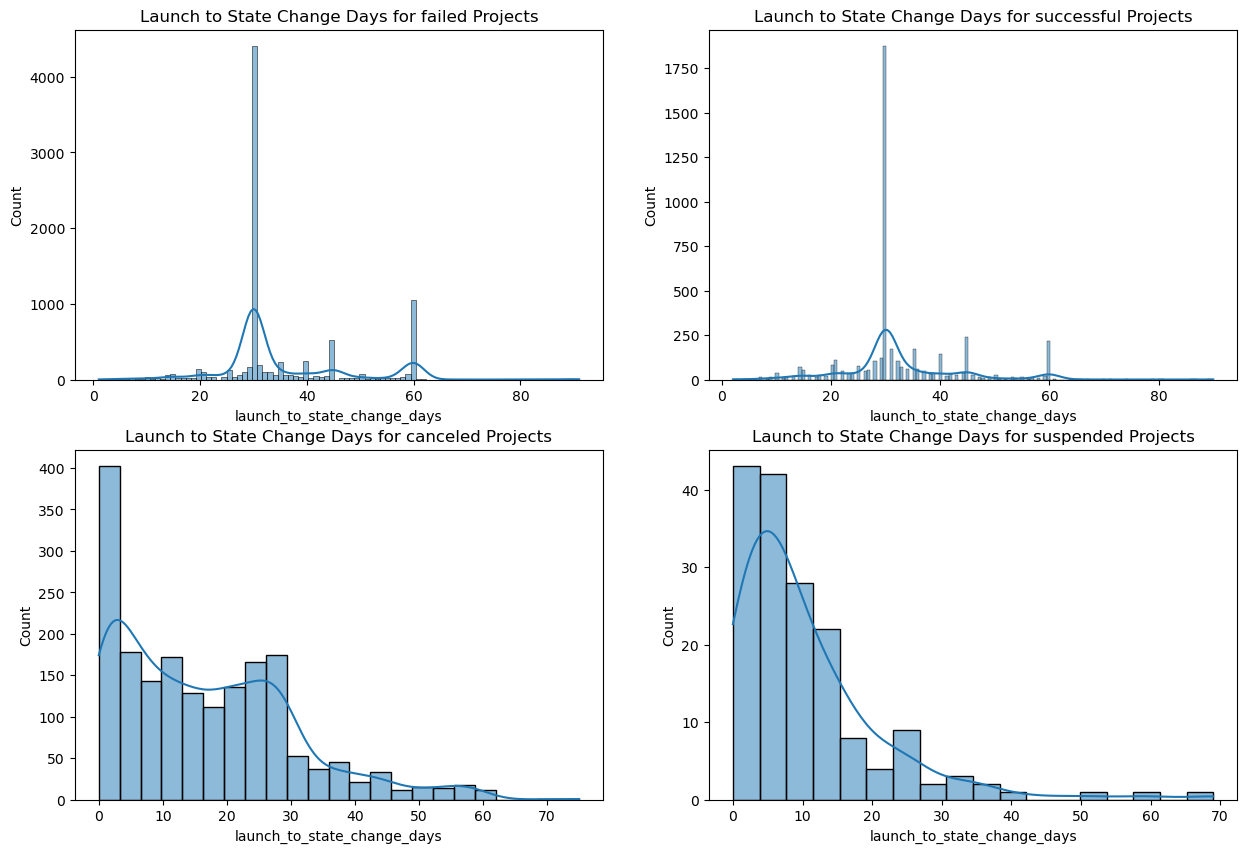

In [16]:
# launch to status change histograms broken out by status 
unique_states = df['state'].unique()
n_cols = 2
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration if it's multidimensional
axes = axes.flatten() if n_rows > 1 else [axes]

# Iterate through each unique state and plot the histogram
for i, state in enumerate(unique_states):
    state_data = df[df['state'] == state]['launch_to_state_change_days']
    
    # Plot the histogram
    sns.histplot(state_data, kde=True, ax=axes[i])
    
    # Set the title for each subplot
    axes[i].set_title(f'Launch to State Change Days for {state} Projects')

* Similar distributions for the number of days it takes for a project to enter status failed or successful. Both multimodal with peaks around the same number of days: 30, 45, and 60. Also similar ranges. This may indicate the typical campaign durations. This can be verified by checking number of days between when projects tend to be launched and their deadline. Plots below validate this hypothesis. Same distribution. The similarity in distribution in days to state change here is from projects coming to a natural close as planned at launch. 
* Days to cancel project is right-skewed with the mode near 0. This may be due to the fact that certain elements of a project cannot be edited after launch for maintaining accountability. Thus, if there's a real error, the user must cancel to make such changes. There's also another peak around 30 days. This may be users cancelling projects if it appears the project will fail **test this later**
* For suspended projects, there is a more signifanct right skew and some gaps in the distribution between ~40 and 70 days. The clusteering between 0 and 10 days shows mechanisms for spotting proejects which do not align with the nature of Kickstarter are working quite well.

In [8]:
# Ensuredatetime column
df['launched_at'] = pd.to_datetime(df['launched_at'])
df['deadline'] = pd.to_datetime(df['deadline'])

# Extract only the date part
df['launched_at_date'] = df['launched_at'].dt.date
df['deadline_date'] = df['deadline'].dt.date

# Calculate the planned duration in days
df['planned_duration'] = (df['deadline'] - pd.to_datetime(df['launched_at_date'])).dt.days

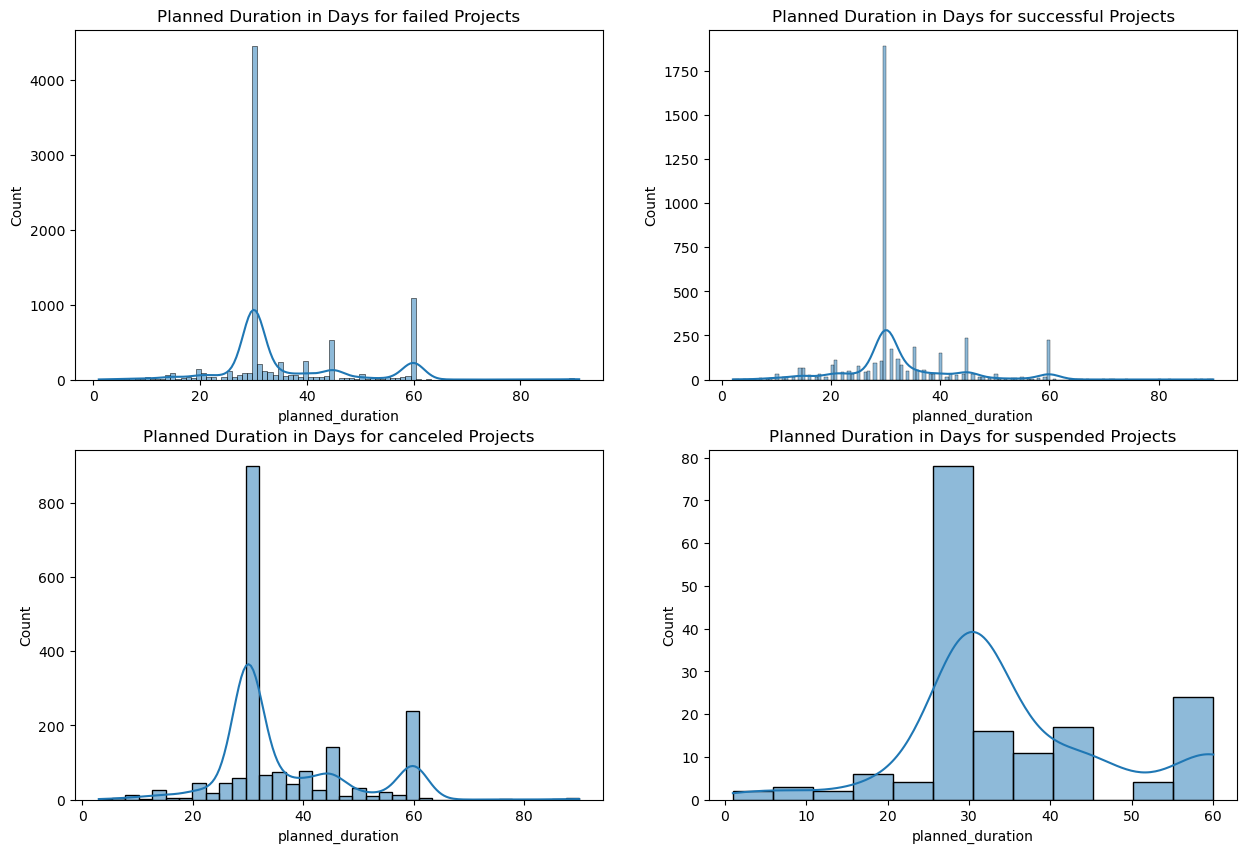

In [34]:

unique_states = df['state'].unique()
n_cols = 2
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration if it's multidimensional
axes = axes.flatten() if n_rows > 1 else [axes]

# Iterate through each unique state and plot the histogram
for i, state in enumerate(unique_states):
    state_data = df[df['state'] == state]['planned_duration']
    
    # Plot the histogram
    sns.histplot(state_data, kde=True, ax=axes[i])
    
    # Set the title for each subplot
    axes[i].set_title(f'Planned Duration in Days for {state} Projects')

* Projects which were cancelled have a similar planned duration to those who went their full length, indicating similar practices being followed across the platform for duration. (confirm if kickstarter has suggested durations. This could validate that this is being largely followed)

In [ ]:
# create version of dataset with encoded categoricals and normalized numerical, perform 2 component PCA and plot for an initial idea of whether there are clusters present
# make commentary, but don't abandon clustering yet

In [ ]:
# pairplots for all the numerical variables, see if any relationships to observe. 
# especially among variables which seemed to have meaningful divides in the univariate analysis

### Multivariate Analysis

In [ ]:
# correlation martrix for numerical
# chi-square tests for categorical

In [ ]:
# check proportion of each categorical variable value that is in each state (mosaic plot)

In [ ]:
# interesting bivariate plots from earlier color coded by state

### Testing Assumptions
* What states are common in the projects which have a very long creaton to state change duration? are these projects ones that are dormant and are being suspended or cancelled?
* Are users cancelling projects that appear they might fail? Peak in cancellations aroudn 30 days. See if those also have planned duration of 30 days and how much of their goal was acheived by that time
* Any notable difference in observed patterns / conclusions by year? 
* Distribution of goals, categories, of staff pick and of spotlight (seperately) projects. perhaps this fits better with bivariate analysis